# CLASSIFICATION ASSIGNMENT3 DECISION TREE

In [3]:
 # Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
import missingno as msno
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import preprocessing

###### Q-1: Load the dataset and print the metadata in the notebook

In [4]:
# Loading the csv dataset from pandas api
df = pd.read_csv('loan_data.csv') 

In [5]:
# displaying the top 5 records to check the data
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# checking descriptional statistical values
df.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [7]:
# displaying the metadata information of loan data dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


###### Q-2: Create a countplot using sns showing the counts of loans by purpose, with the color hue defined by not.fully.paid

In [8]:
# checking the target columns unique values
df['not.fully.paid'].unique()

array([0, 1], dtype=int64)

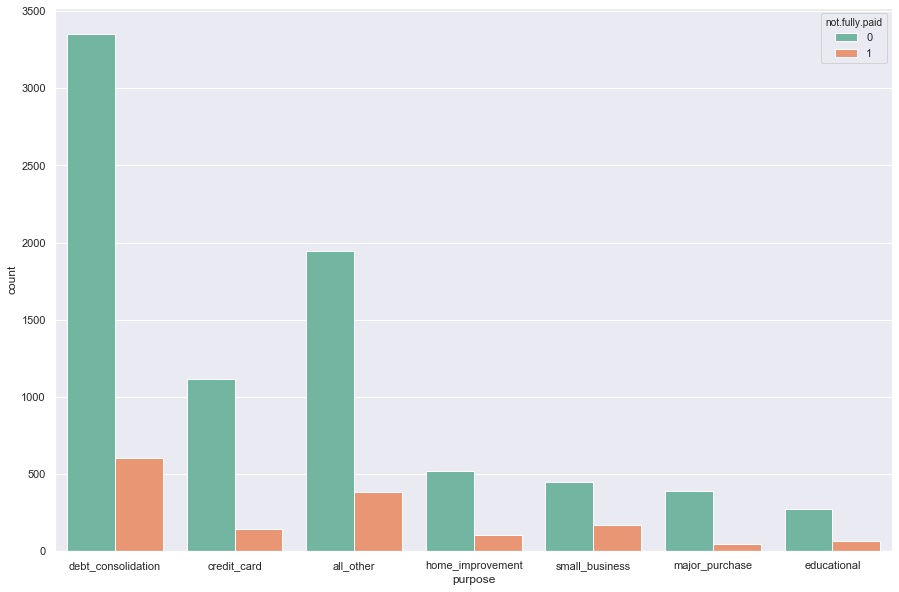

In [9]:
# how columns are distributed in terms of categorical columns, purpose
sns.countplot(x="purpose", hue='not.fully.paid', data=df, palette="Set2")

###### Q-3: Print a heatmap to check NULL values

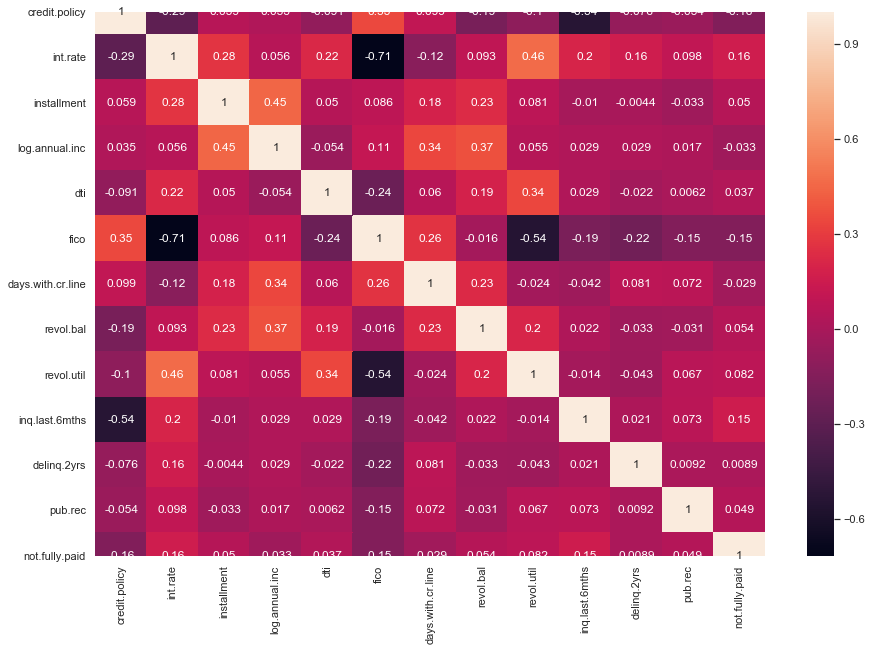

In [10]:
# finding the correlations between the variables and displaying it
corr = df.corr()
sns.heatmap(corr, annot=True)

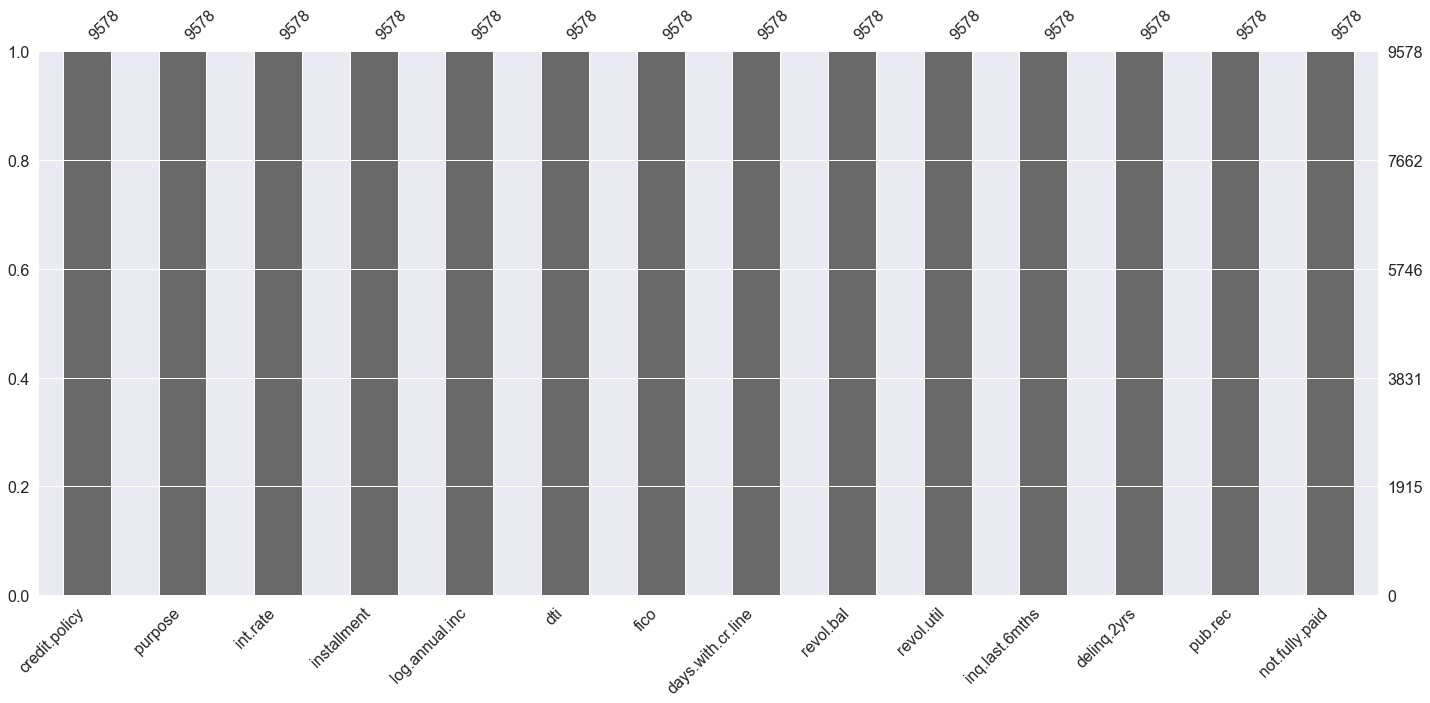

In [11]:
# for checking null values
# Visualize missing values (NaN) values using Missingno Library
msno.bar(df) 
# there is no NaN Values from the below graph

In [12]:

# checking the distribution of output columns
df['not.fully.paid'].value_counts()
# it shows we have imbalanced dataset

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [13]:
# checking the categorical columns, purpose unique values for encoding
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [14]:
# features are replaced with a blend of posterior probability of the target given particular categorical value 
# and the prior probability of the target over all the training data.
encoder = TargetEncoder()
df['purpose'] = encoder.fit_transform(df['purpose'], df['not.fully.paid'])

In [15]:
df['purpose'].unique()


array([0.15238817, 0.11568938, 0.16602317, 0.17011129, 0.27786753,
       0.11212815, 0.20116618])

In [16]:
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.152388,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.115689,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.152388,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.152388,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.115689,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
# checking null values for all the columns
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

###### Q-4: Perform startified splitting of train and test data


In [18]:
# here last column is the target column, so taking last column as target column
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [20]:
X.iloc[:,:].head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1.0,0.242912,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0
1,1.0,0.021487,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0
2,1.0,0.242912,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0
3,1.0,0.242912,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0
4,1.0,0.021487,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0


In [21]:
# splitting the dataset as train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

###### Q-5: Build a classifier model using Decision Tree algorithm and plot the same


In [22]:
# building model with decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

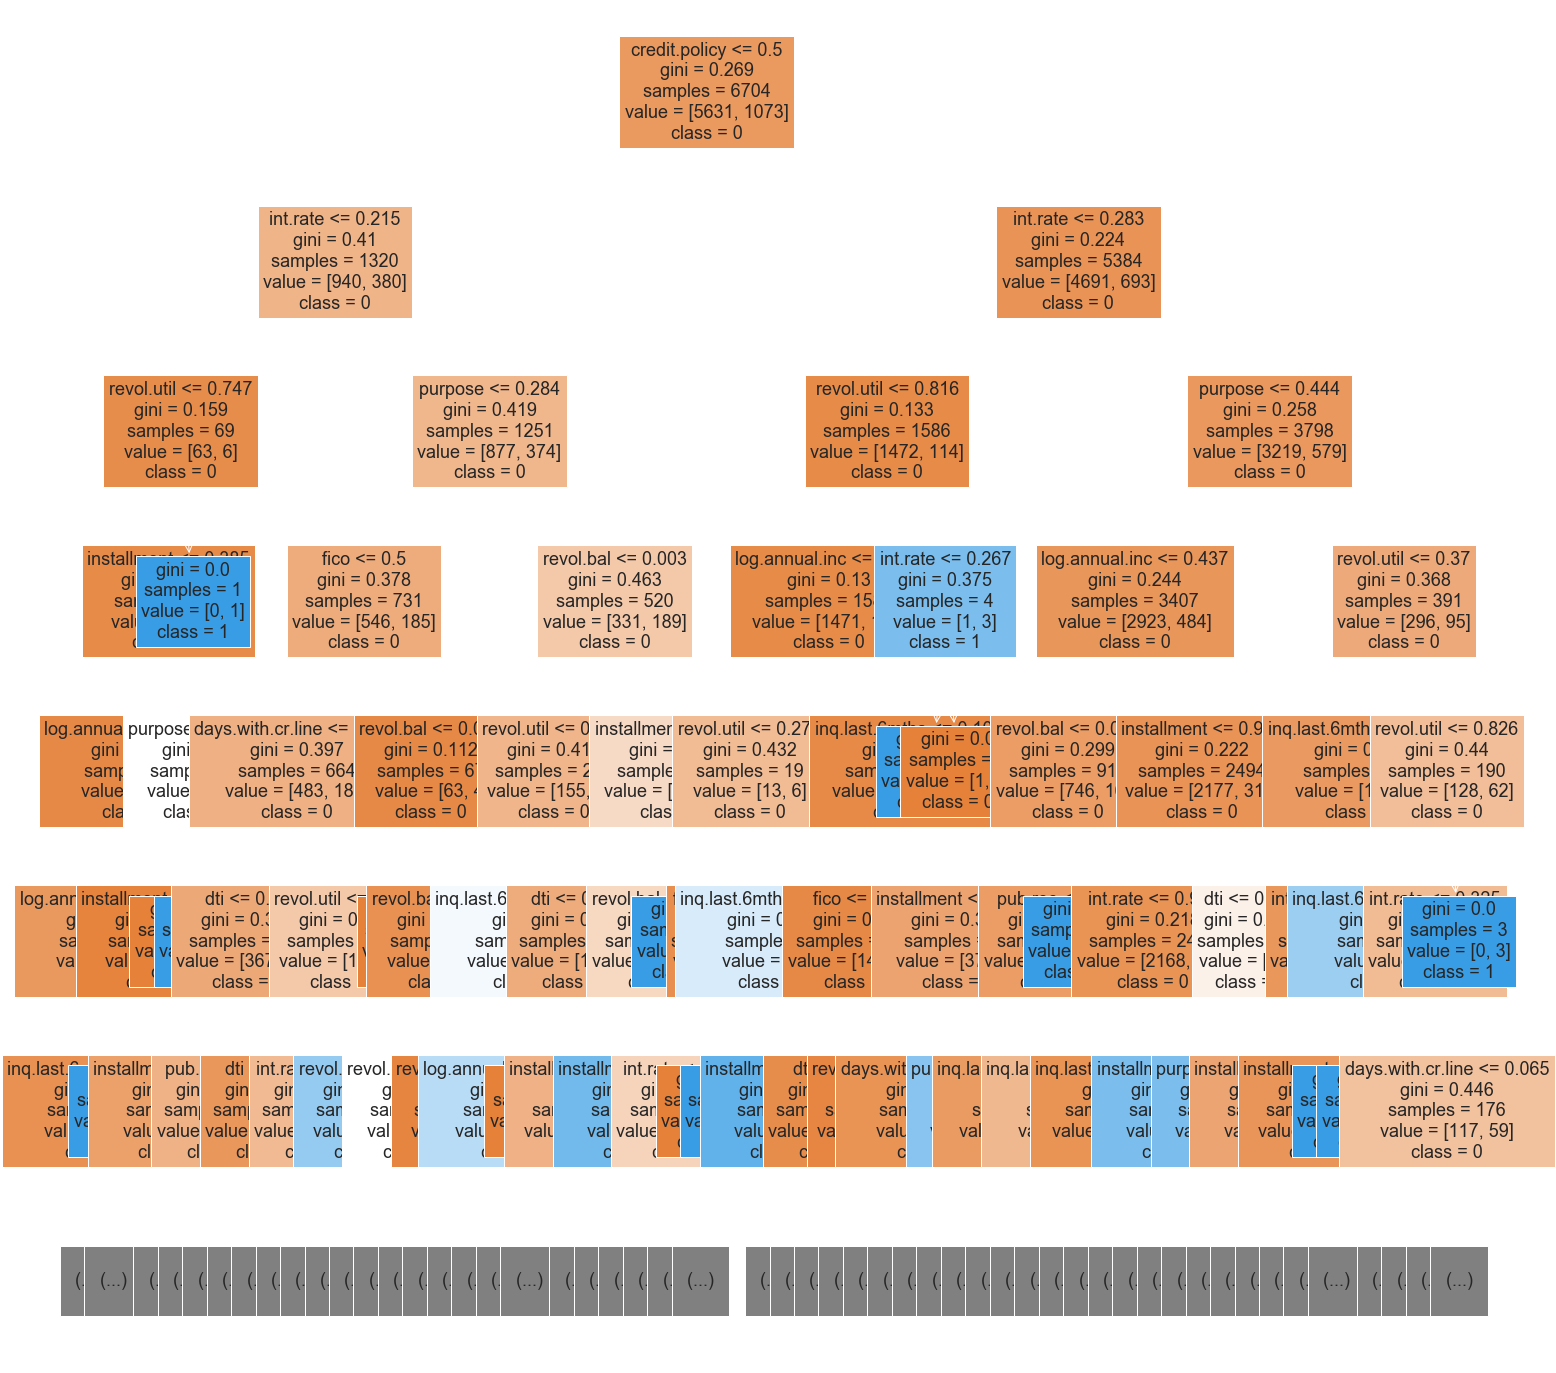

In [23]:
# plotting the decision tree with the train dataset
plt.figure(figsize=(25,25))
tree.plot_tree(dt, filled=True, max_depth=6, feature_names=X.columns,class_names=['0','1'],fontsize=18)
plt.show()

###### Q-6: Print classification report


In [24]:
# predicting the test data and calculating confusion  matrix
predictions = dt.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[2015  399]
 [ 359  101]]


In [25]:
# generating calssification report like precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2414
           1       0.20      0.22      0.21       460

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



###### Q-7: Find out the stratified cross validation accuracy


In [26]:
# When evaluating different settings (“hyperparameters”) there is still a risk of overfitting on the test set 
# because the parameters can be tweaked until the estimator performs optimally
# so cross-validation is used
# if the estimator is a classifier and y is either binary or multiclass, :class:`StratifiedKFold` is used
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=9)

In [27]:
scores

array([0.73896714, 0.73521127, 0.73521127, 0.76879699, 0.74906015,
       0.73966165, 0.75845865, 0.64379699, 0.47977422])

In [28]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.71 (+/- 0.17)


# COMPLETE